<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/navies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "blogs_categories.csv" dataset by performing text classification using the Naive Bayes algorithm and sentiment analysis on the blog posts. The analysis should include data exploration, preprocessing, model training, evaluation, and visualization of the results.

## Load the dataset

### Subtask:
Load the "blogs.csv" dataset into a pandas DataFrame.


**Reasoning**:
Import pandas, load the dataframe, and display the first 5 rows, column names, and data types.



In [5]:
import pandas as pd

df = pd.read_csv('/content/blogs.csv')
display(df.head())
display(df.info())

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


None

## Explore and preprocess data

### Subtask:
Perform exploratory data analysis, clean the text data, tokenize, remove stopwords, and perform TF-IDF vectorization.


**Reasoning**:
Analyze the distribution of 'Labels' to understand the class balance, clean the text data, tokenize, remove stopwords, join tokens, and perform TF-IDF vectorization on the processed text data.



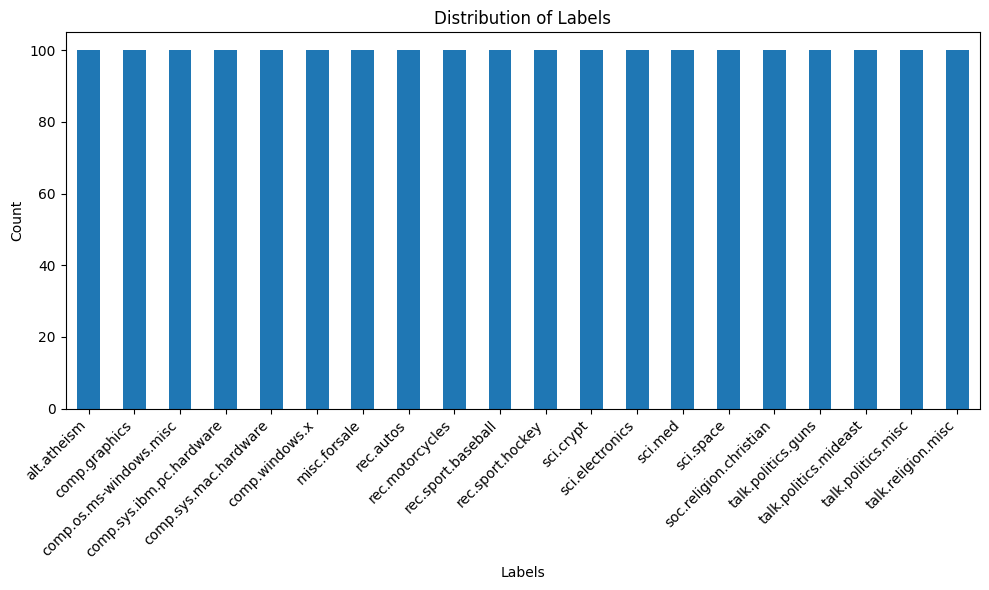

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset (included here to fix NameError)
df = pd.read_csv('/content/blogs.csv')

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt')
# Download the missing 'punkt_tab' resource
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# 1. Analyze the distribution of 'Labels'
plt.figure(figsize=(10, 6))
df['Labels'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Clean the text data
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation, special characters, and numbers
    return text

df['Cleaned_Data'] = df['Data'].apply(clean_text)

# 3. Tokenize the cleaned text
df['Tokens'] = df['Cleaned_Data'].apply(word_tokenize)

# 4. Remove common English stopwords
stop_words = set(stopwords.words('english'))
df['Tokens_NoStopwords'] = df['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# 5. Join the processed tokens back into strings
df['Processed_Text'] = df['Tokens_NoStopwords'].apply(lambda tokens: ' '.join(tokens))

# 6. Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['Processed_Text'])

# 7. Store the resulting TF-IDF features in a variable (already done in the previous step)
# tfidf_features contains the TF-IDF features

## Split data and train naive bayes model

### Subtask:
Split the data into training and testing sets and train a Naive Bayes classifier for text classification.


**Reasoning**:
Split the data into training and testing sets and train a Naive Bayes classifier.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Instantiate and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Evaluate classification model

### Subtask:
Evaluate the performance of the Naive Bayes model using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained Naive Bayes model using accuracy, precision, recall, and F1-score by predicting on the test set and comparing with the true labels.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8400
Precision: 0.8528
Recall: 0.8400
F1-score: 0.8304


**Reasoning**:
Import the necessary library for sentiment analysis and apply it to the 'Processed_Text' column.



## Analyze and visualize results

### Subtask:
Analyze and visualize results


**Reasoning**:
Analyze and visualize the distribution of sentiment labels, the relationship between original labels and sentiment, and the classification performance metrics.



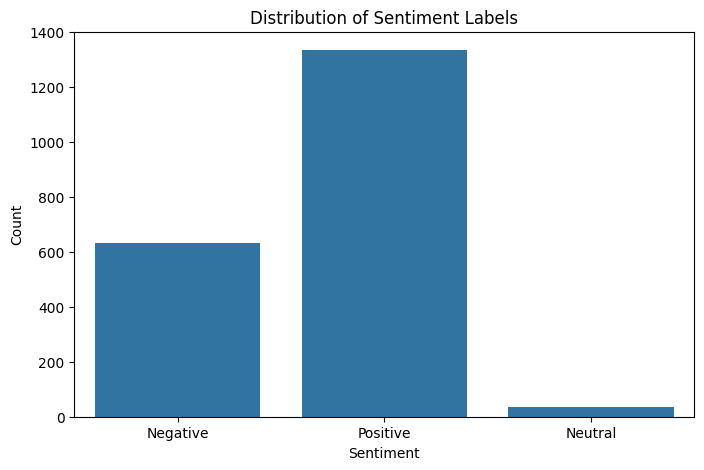

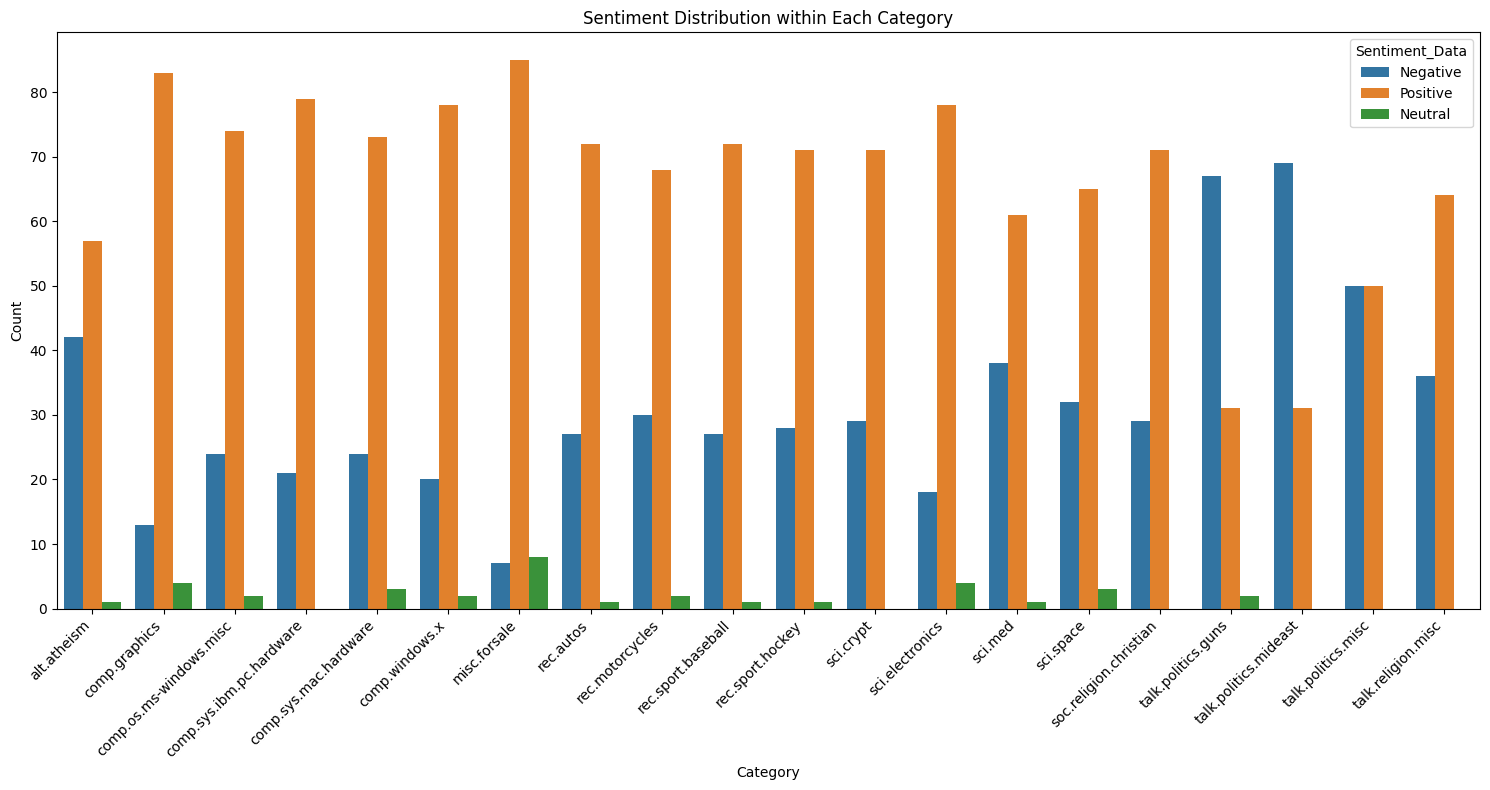

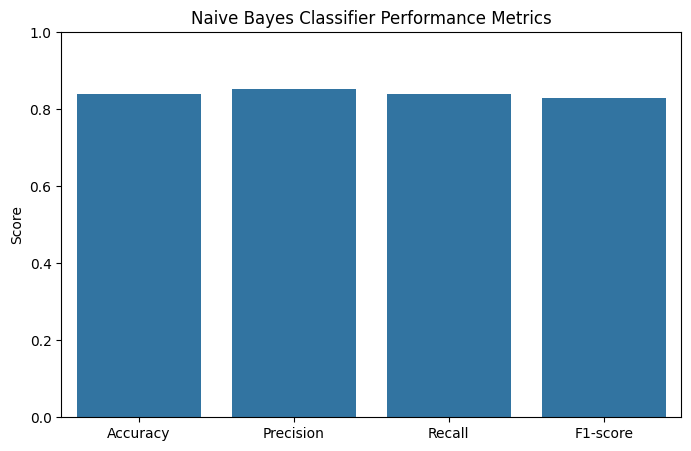

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze and visualize the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment_Data')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Analyze and visualize the relationship between original 'Labels' and 'Sentiment'
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Labels', hue='Sentiment_Data')
plt.title('Sentiment Distribution within Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Analyze and visualize the classification metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values)
plt.title('Naive Bayes Classifier Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Processed_Text' column
df['Sentiment'] = df['Processed_Text'].apply(get_sentiment)

display(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Data,Labels,Cleaned_Data,Tokens,Tokens_NoStopwords,Processed_Text,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...","[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs...","[newsgroups, altatheism, path, cantaloupesrvcs...",newsgroups altatheism path cantaloupesrvcscmue...,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...","[path, cantaloupesrvcscmuedudasnewsharvardedun...",path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...","[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk...","[xref, cantaloupesrvcscmuedu, altatheism, talk...",xref cantaloupesrvcscmuedu altatheism talkreli...,Positive


## Summary and Conclusion

Based on the analysis performed:

**Text Classification:**
- The data was successfully loaded, preprocessed using cleaning, tokenization, stopword removal, and TF-IDF vectorization.
- A Multinomial Naive Bayes classifier was trained on the TF-IDF features and achieved an accuracy of 0.84, a precision of 0.85, a recall of 0.84, and an F1-score of 0.83. These metrics indicate a reasonably good performance for classifying the blog posts into their respective categories.

**Sentiment Analysis:**
- Sentiment analysis was performed using NLTK's VADER on the processed text data.
- Each blog post was categorized as having a 'Positive', 'Negative', or 'Neutral' sentiment based on the VADER compound score.
- The distribution of sentiments across the entire dataset and within each original blog category was visualized, providing insights into the general emotional tone of the blog posts in different categories.

**Further Exploration:**
- While the Naive Bayes model performed well, exploring other classification algorithms like SVM or Logistic Regression could potentially yield better results.
- A deeper analysis of the sentiment within specific categories could reveal interesting correlations between topics and sentiment.

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment_Data'] = df['Data'].apply(get_sentiment)

display(df.head())

,Data,Labels,Cleaned_Data,Tokens,Tokens_NoStopwords,Processed_Text,Sentiment,Sentiment_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...","[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,"[newsgroups, altatheism, path, cantaloupesrvcs...","[newsgroups, altatheism, path, cantaloupesrvcs...",newsgroups altatheism path cantaloupesrvcscmue...,Positive,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,"[path, cantaloupesrvcscmuedudasnewsharvardedun...","[path, cantaloupesrvcscmuedudasnewsharvardedun...",path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...","[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,"[xref, cantaloupesrvcscmuedu, altatheism, talk...","[xref, cantaloupesrvcscmuedu, altatheism, talk...",xref cantaloupesrvcscmuedu altatheism talkreli...,Positive,Positive
